# Importing Libraries

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset 

In [ ]:
#import the dataset
dataset=pd.read_csv('/content/petrol_consumption.csv')

In [ ]:
#explore the dataset
dataset.shape

(48, 5)

In [ ]:
#explore the dataset
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
#explore the dataset
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


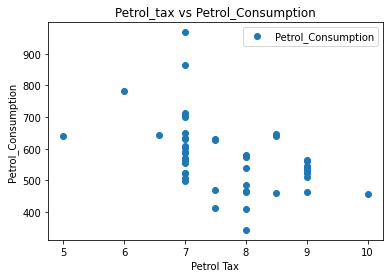

In [ ]:
#plotting the dataset to check if there are any relationship
dataset.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('Petrol_tax vs Petrol_Consumption')
plt.xlabel('Petrol Tax')
plt.ylabel('Petrol_Consumption')
plt.show()

# Preparing the data

In [ ]:
#dividing the data into attributes as X and labels as y
X=dataset[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y=dataset['Petrol_Consumption']

# Training the Algorithm

In [ ]:
#Splitting data into training data and testing data
#randomly allocating 20% of data for testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#training the regression algorithm
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#retreiving the most optimal coefficients for all attributes
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


#Making Predictions

In [ ]:
#predicting using test data
y_pred = regressor.predict(X_test)

In [ ]:
#comparing the predicted values and the actual values
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


#Evaluating the predictions

In [ ]:
#evaluating the algorithm with error functions
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.8222474789647
Mean Squared Error: 4666.344787588362
Root Mean Squared Error: 68.31064915215168


# Conclusion

The value of the root mean squared error is 56.82, which is slightly less than 10% of the mean value of the gas consumption of in all states of 576. This means our model did a reasonably decent job.